In [ ]:
# Successive Over-Relaxation (SOR) method to solve Laplace equation
# so fasttttt
#from pylab import imshow,gray,show
import matplotlib.pyplot as plt
import numpy as np

#set up grid
nx,ny = 100,100
x = np.linspace(0, nx, nx + 1)
y = np.linspace(0, ny, ny + 1)
X, Y = np.meshgrid(x, y)
L = 1
delta = L/nx


#charge density
rho = np.zeros([nx+1,ny+1],float)
rho[40:60,:] = 1e12* (1.6e-19) #C/m^2
epsilon = 8.85e-12 #F/m

#time steps
steps = 100
time_step = 1e-1

#magnetic field
B = 0.1 #Tesla

In [2]:
def solve_Poisson(rho, w=1.8, threshold=1e-4):
    phi_ori = np.zeros([nx+1, ny+1], float)
    phi_pred = np.zeros([nx+1, ny+1], float)
    phi_new = np.zeros([nx+1, ny+1], float)

    phi_ori[0,:] = 0
    phi_ori[nx,:] =0
    phi_ori[:,0] = phi_ori[:,ny]
    diff = 1
    iteration = 0

    while diff > threshold:
        for i in range (1,nx):
            for j in range (ny+1):
                if  j==0 or j ==100:
                    phi_pred[i,j] =  1/4*(phi_new[i+1,j]+phi_new[i-1,j]+phi_new[i,(j+1)%(ny+1)]+phi_new[i,(j-1)%(ny+1)]-rho[i,j]/epsilon*delta)
                    phi_new[i,j] = (1-w)*phi_ori[i,j] + w*phi_pred[i,j]
                else:
                    phi_pred[i,j]= 1/4*(phi_new[i+1,j]+phi_new[i-1,j]+phi_new[i,j+1]+phi_new[i,j-1]-rho[i,j]/epsilon*delta)
                    phi_new[i,j] = (1-w)*phi_ori[i,j] + w*phi_pred[i,j]


        diff = np.max(abs(phi_new - phi_ori))
        phi_ori = phi_new.copy()
        iteration += 1

        if iteration % 200 == 0:
            print(f"Iteration: {iteration}, Max Difference: {diff:.2e}")

    return phi_new, iteration

In [15]:
def electric_field(phi):
    Ex = np.zeros([nx+1, ny+1], float)
    Ey = np.zeros([nx+1, ny+1], float)

    for i in range(1, nx):
        for j in range(1, ny):
            #row of an array is 'i' (y-direction)
            #column of an array is 'j' (x-direction)
            Ex[i, j] = -(phi[i, j + 1] - phi[i, j - 1]) / (2*delta)
            Ey[i, j] = -(phi[i + 1, j] - phi[i - 1, j]) / (2*delta)


    plt.show()
    return Ex, Ey

Iteration: 200, Max Difference: 1.33e+02
Iteration: 400, Max Difference: 5.46e+01
Iteration: 600, Max Difference: 2.23e+01
Iteration: 800, Max Difference: 9.15e+00
Iteration: 1000, Max Difference: 3.75e+00
Iteration: 1200, Max Difference: 1.53e+00
Iteration: 1400, Max Difference: 6.28e-01
Iteration: 1600, Max Difference: 2.57e-01
Iteration: 1800, Max Difference: 1.05e-01
Iteration: 2000, Max Difference: 4.31e-02
Iteration: 2200, Max Difference: 1.77e-02
Iteration: 2400, Max Difference: 7.23e-03
Iteration: 2600, Max Difference: 2.96e-03
Iteration: 2800, Max Difference: 1.21e-03
Iteration: 3000, Max Difference: 4.97e-04
Iteration: 3200, Max Difference: 2.03e-04


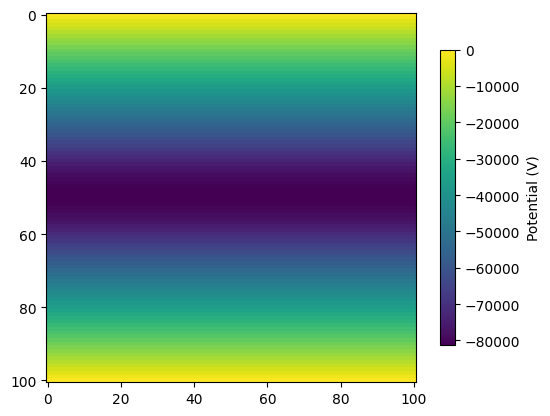

In [ ]:
phi = solve_Poisson(rho)[0]
plt.imshow(phi)
plt.colorbar(label="Potential (V)",shrink=0.9)


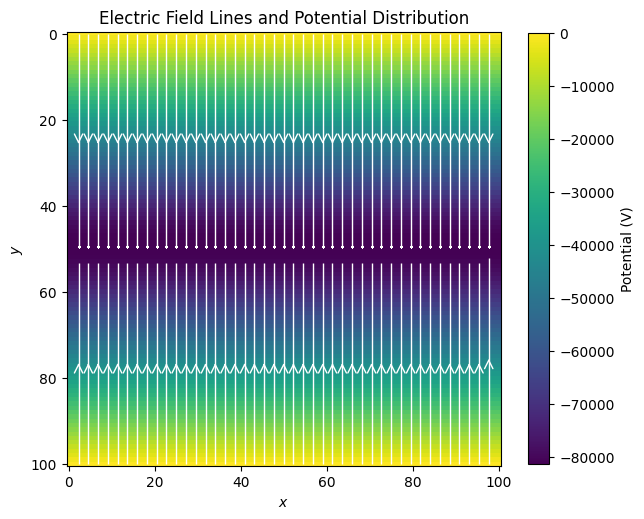

In [ ]:
Ex, Ey = electric_field(phi)
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Electric Field Lines and Potential Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.streamplot(X, Y, Ex, Ey, color="white", linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='->', arrowsize=1.5)


plt.imshow(phi)
plt.colorbar(label="Potential (V)",shrink=0.8)
plt.show()